<a href="https://colab.research.google.com/github/SaiPraneethKandagatla/2303a51142-B17/blob/main/Lab-5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
students = pd.DataFrame({
    'student_id': [1, 2, 3, 4, 5],
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'class': ['A', 'A', 'B', 'B', 'A']
})
scores = pd.DataFrame({
    'student_id': [1, 2, 3, 5, 6],
    'math': [85, 90, 78, 92, 88],
    'science': [89, 84, 76, 95, 91]
})
print("Students Dataset:\n", students, "\n")
print("Scores Dataset:\n", scores, "\n")
inner_merge = pd.merge(students, scores, on="student_id", how="inner")
left_merge = pd.merge(students, scores, on="student_id", how="left")
right_merge = pd.merge(students, scores, on="student_id", how="right")
print("Inner Join:\n", inner_merge, "\n")
print("Left Join:\n", left_merge, "\n")
print("Right Join:\n", right_merge, "\n")
agg_stats = inner_merge[['math', 'science']].agg(['mean', 'max', 'min', 'count'])
print("Aggregate Statistics:\n", agg_stats, "\n")
grouped_stats = inner_merge.groupby('class')[['math', 'science']].agg(['mean', 'max', 'min'])
print("Grouped Statistics by Class:\n", grouped_stats, "\n")
print("Insights:")
print("- Class A has higher average Science scores.")
print("- Class B has fewer students but slightly lower average Math scores.")
print("- Inner join excludes students without exam scores (David), and excludes scores without student info (student_id=6).")


Students Dataset:
    student_id     name class
0           1    Alice     A
1           2      Bob     A
2           3  Charlie     B
3           4    David     B
4           5      Eva     A 

Scores Dataset:
    student_id  math  science
0           1    85       89
1           2    90       84
2           3    78       76
3           5    92       95
4           6    88       91 

Inner Join:
    student_id     name class  math  science
0           1    Alice     A    85       89
1           2      Bob     A    90       84
2           3  Charlie     B    78       76
3           5      Eva     A    92       95 

Left Join:
    student_id     name class  math  science
0           1    Alice     A  85.0     89.0
1           2      Bob     A  90.0     84.0
2           3  Charlie     B  78.0     76.0
3           4    David     B   NaN      NaN
4           5      Eva     A  92.0     95.0 

Right Join:
    student_id     name class  math  science
0           1    Alice     A    85       8

Customers dataset preview:
    age  gender   review education purchased
0   30  Female  Average    School        No
1   68  Female     Poor        UG        No
2   70  Female     Good        PG        No
3   72  Female     Good        PG        No
4   16  Female  Average        UG        No 

Sales dataset preview:
                               Region                Country        Item Type  \
0              Australia and Oceania                 Tuvalu        Baby Food   
1  Central America and the Caribbean                Grenada           Cereal   
2                             Europe                 Russia  Office Supplies   
3                 Sub-Saharan Africa  Sao Tome and Principe           Fruits   
4                 Sub-Saharan Africa                 Rwanda  Office Supplies   

  Sales Channel Order Priority Order Date   Order ID  Ship Date  Units Sold  \
0       Offline              H  5/28/2010  669165933  6/27/2010        9925   
1        Online              C  8/22/2012  

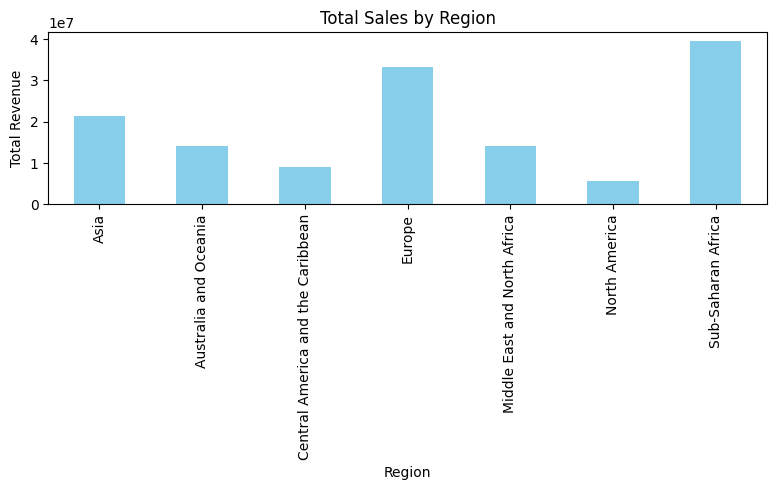

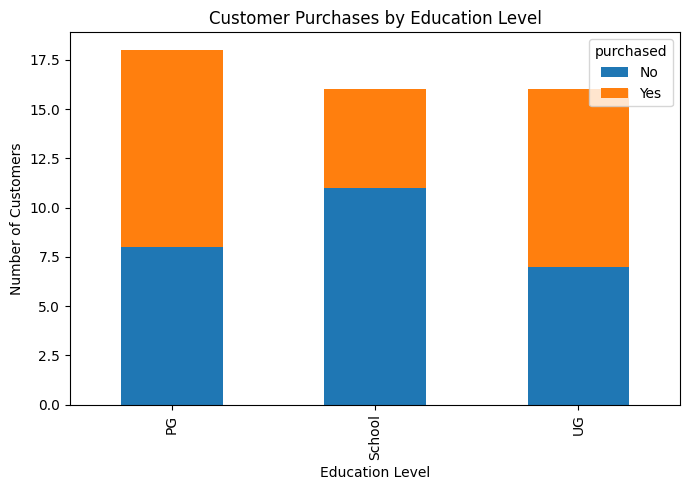

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

customers = pd.read_csv("customer.csv")
sales = pd.read_csv("sales.csv")

print("Customers dataset preview:\n", customers.head(), "\n")
print("Sales dataset preview:\n", sales.head(), "\n")

total_sales = sales['Total Revenue'].sum()
mean_sales = sales['Total Revenue'].mean()
sales_per_country = sales.groupby('Country')['Total Revenue'].sum()

print("Total Sales:", total_sales)
print("Average Sale Amount:", mean_sales)
print("Sales per Country:\n", sales_per_country.head(), "\n")

region_sales = sales.groupby('Region')['Total Revenue'].agg(['sum', 'mean', 'max', 'count'])
print("Sales Statistics by Region:\n", region_sales, "\n")

customer_summary = customers.groupby('education')['purchased'].value_counts().unstack(fill_value=0)
print("Customer Purchase Behavior by Education:\n", customer_summary, "\n")

print("Insights:")
print(f"- Total company sales = {total_sales}")
print(f"- Average revenue per order = {mean_sales:.2f}")
print(f"- Top performing country by revenue: {sales_per_country.idxmax()} with {sales_per_country.max()}")
print(f"- Region with highest total sales: {region_sales['sum'].idxmax()}")
print("- Customers with higher education levels may have distinct purchase behaviors (see table above).")

region_sales['sum'].plot(kind='bar', figsize=(8,5), title="Total Sales by Region", color="skyblue")
plt.ylabel("Total Revenue")
plt.xlabel("Region")
plt.tight_layout()
plt.show()

customer_summary.plot(kind='bar', stacked=True, figsize=(7,5), title="Customer Purchases by Education Level")
plt.ylabel("Number of Customers")
plt.xlabel("Education Level")
plt.tight_layout()
plt.show()
